In [1]:
import pandas as pd 
import sys
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['figure.dpi']=100
pd.options.display.max_colwidth = 90 

#### Functions 

In [2]:
def visualize_term(df, term):
    df_term=df.loc[df['search_term'] == term]
    term_list=df_term['sequence']
    date_list= df_term['date']
    window_left=[]
    window_right=[]
    term_l=[]
    for i in term_list:
        idx=i.index(term)
        term_size=len(term)+2
        window_left.append(i[2:idx-3])
        window_right.append(i[idx+term_size:])
        term_l.append(term)
    v_d = {'year':date_list, 'words_left':window_left, 'term':term_l, 'words_right': window_right}
    v_df = pd.DataFrame(v_d)
    f_vdf= v_df[['year','words_left', 'term', 'words_right']]
    return f_vdf

In [3]:
def freq_count(df):
    freq_count={}
    for i in df["year"]:
        if i not in freq_count:
            freq_count[i]={}
            freq_count[i]=1
                
        else:
            freq_count[i]+=1
    return freq_count

In [4]:
def plot_freq_count(freq_count, term):
    plt.plot(freq_count.keys(), freq_count.values(), 'x')
    plt.xlabel('Years')
    plt.ylabel('Frequency')
    plt.title('Frequency of ' + term + ' term')
    plt.show()

#### Load the data into a Pandas dataframe

We are renaming the columns of the csv in order to avoi spaces in the column names

In [5]:
df = pd.read_csv("./results_NLS/results_window_concordance_total.csv") 
# Preview the first 5 lines of the loaded data 
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
# Displaying the dataframe
df.head()

,date,title,edition,archive,filename,search_term,sequence
0,1853,Encyclopaedia Britannica,"Eighth edition, Volume 5, Bombay-BUR",/home/tdm/datasets/nls-data-encyclopaediaBritannica/193108324,alto/194187123.34.xml,man,"['the', 'soul', 'he', 'is', 'eulogized', 'by', 'luther', 'as', 'an', 'excellent', 'man..."
1,1853,Encyclopaedia Britannica,"Eighth edition, Volume 5, Bombay-BUR",/home/tdm/datasets/nls-data-encyclopaediaBritannica/193108324,alto/194187123.34.xml,man,"['by', 'bellarmin', 'as', 'a', 'doctor', 'alike', 'beloved', 'by', 'god', 'and', 'man'..."
2,1853,Encyclopaedia Britannica,"Eighth edition, Volume 5, Bombay-BUR",/home/tdm/datasets/nls-data-encyclopaediaBritannica/193108324,alto/194187123.34.xml,man,"['renounced', 'his', 'liberty', 'and', 'became', 'a', 'slave', 'to', 'some', 'great', ..."
3,1853,Encyclopaedia Britannica,"Eighth edition, Volume 5, Bombay-BUR",/home/tdm/datasets/nls-data-encyclopaediaBritannica/193108324,alto/194187175.34.xml,man,"['which', 'he', 'bore', 'with', 'exemplary', 'patience', 'and', 'serenity', 'this', 'e..."
4,1853,Encyclopaedia Britannica,"Eighth edition, Volume 5, Bombay-BUR",/home/tdm/datasets/nls-data-encyclopaediaBritannica/193108324,alto/194187214.34.xml,man,"['necessary', 'as', 'clothing', 'and', 'shelter', 'to', 'the', 'comfort', 'of', 'civil..."


###  Exploring "Scotland" Term

First we select the rows from the dataframe that has the **"scotland"** string in the "term" column, and count the number of elements. 

Later we visualize the left and right words for each **"scotland"** term found

And finally, we visualize the frequency of the **"scotland"** over the years.

In [6]:
scotland_vdf= visualize_term(df, "scotland")
print("The number of hits is: %s" %scotland_vdf['term'].value_counts())
#Just printing the first 10 hits, since we have 32131 rows for this term
scotland_vdf.head(10)

The number of hits is: scotland    32131
Name: term, dtype: int64


,year,words_left,term,words_right
11,1853,"and', 'castle', 'and', 'the', 'like', 'royal', 'boroughs', 'or', 'burghs', 'in'",scotland,"'are', 'corporations', 'originally', 'created', 'for', 'the', 'advantage', 'of', 'tra..."
21,1853,"publications', 'as', 'in', 'the', 'general', 'assembly', 'of', 'the', 'church', 'of'",scotland,"'from', 'both', 'these', 'fields', 'of', 'contention', 'the', 'opponents', 'of', 'les..."
45,1853,"judges', 'of', 'the', 'supreme', 'courts', 'of', 'session', 'and', 'justiciary', 'in'",scotland,"'he', 'was', 'born', 'in', 'and', 'successively', 'prosecuted', 'his', 'studies', 'at']"
46,1853,"to', 'many', 'of', 'the', 'conspicuous', 'characters', 'at', 'that', 'time', 'in'",scotland,"'among', 'others', 'to', 'lord', 'kaimes', 'lord', 'hailes', 'dr', 'robertson', 'and']"
47,1853,"this', 'island', 'he', 'published', 'a', 'narrative', 'on', 'his', 'return', 'to'",scotland,"'entitled', 'an', 'account', 'of', 'corsica', 'with', 'memoirs', 'of', 'general', 'pa..."
51,1853,"at', 'this', 'presidency', 'two', 'ministers', 'of', 'the', 'church', 'blishment', 'of'",scotland,"'appointed', 'and', 'maintained', 'by', 'the', 'east', 'india', 'company', 'subject',..."
59,1853,"of', 'persons', 'returned', 'as', 'booksellers', 'and', 'publishers', 'in', 'england',...",scotland,"'at', 'the', 'census', 'of', 'males', 'females', 'persons', 'england', 'and', 'wales']"
60,1853,"at', 'the', 'census', 'of', 'males', 'females', 'persons', 'england', 'and', 'wales'",scotland,"'total', 'in', 'ireland', 'from', 'the', 'calculation', 'of', 'an', 'extensive', 'boo..."
62,1853,"see', 'wodrows', 'hist', 'of', 'the', 'sufferings', 'of', 'the', 'church', 'of'",scotland,"'bootan', 'this', 'extensive', 'region', 'is', 'situated', 'between', 'bound', 'benga..."
76,1853,"rivers', 'lakes', 'and', 'remarkable', 'places', 'in', 'the', 'northern', 'counties', ...",scotland,"'to', 'which', 'is', 'added', 'instruction', 'to', 'young', 'anglers', 'by', 'andrew']"


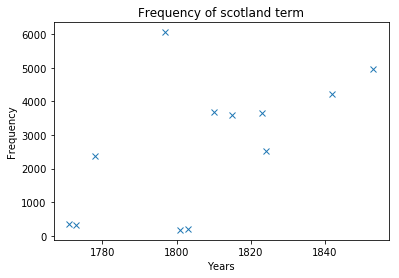

In [7]:
scotland_f_count=freq_count(scotland_vdf)
plot_freq_count(scotland_f_count, "scotland")

In [8]:
#displaying the same information as a dictionary - keys are the years, and values are frequencies
scotland_f_count

{1771: 342,
 1773: 335,
 1778: 2379,
 1797: 6058,
 1801: 177,
 1803: 193,
 1810: 3671,
 1815: 3595,
 1823: 3654,
 1824: 2525,
 1842: 4233,
 1853: 4969}

###  Exploring "Edinburgh" Term

First we select the rows from the dataframe that has the **"edinburgh"** string in the "term" column, and count the number of elements. 

Later we visualize the left and right words for each **"edinburgh"** term found

And finally, we visualize the frequency of the **"edinburgh"** over the years.

In [9]:
edinburgh_vdf= visualize_term(df, "edinburgh")
print("The number of hits is: %s" %edinburgh_vdf['term'].value_counts())
#Just printing the first 10 hits, since we have 14265 rows for this term
edinburgh_vdf.head(10)

The number of hits is: edinburgh    14265
Name: term, dtype: int64


,year,words_left,term,words_right
8,1853,"common', 'interest', 'the', 'four', 'burghs', 'which', 'composed', 'this', 'court', 'w...",edinburgh,"'stirling', 'roxburgh', 'and', 'berwick', 'but', 'the', 'last', 'two', 'falling', 'in..."
9,1853,"be', 'held', 'at', 'inverkeithing', 'but', 'borough', 'is', 'now', 'held', 'at'",edinburgh,"'under', 'the', 'denomination', 'of', 'the', 'convention', 'of', 'royal', 'burghs', '..."
10,1853,"to', 'its', 'situation', 'on', 'the', 'great', 'road', 'from', 'york', 'to'",edinburgh,"'and', 'previous', 'to', 'the', 'passing', 'of', 'the', 'reform', 'act', 'it']"
12,1853,"filled', 'it', 'with', 'much', 're', 'j', 'n', 'he', 'removed', 'to'",edinburgh,"'where', 'his', 'merit', 'and', 'modesty', 'very', 'soon', 'introduced', 'him', 'to']"
13,1853,"a', 'great', 'measure', 'to', 'the', 'literary', 'and', 'scientific', 'society', 'of'",edinburgh,"'and', 'enablec', 'him', 'to', 'gratify', 'himself', 'by', 'a', 'personal', 'introduc..."
14,1853,"permanent', 'remembrance', 'in', 'he', 'was', 'received', 'into', 'the', 'university',...",edinburgh,"'in', 'consequence', 'of', 'an', 'arrangement', 'between', 'his', 'two', 'illustrious..."
15,1853,"he', 'published', 'in', 'the', 'transactions', 'of', 'the', 'royal', 'society', 'of'",edinburgh,"'a', 'biographical', 'account', 'of', 'dr', 'matthew', 'stewart', 'which', 'is', 'rem..."
18,1853,"at', 'the', 'time', 'by', 'a', 'majority', 'of', 'the', 'presbytery', 'of'",edinburgh,"'and', 'made', 'the', 'subject', 'of', 'very', 'angry', 'discussion', 'as', 'well']"
19,1853,"design', 'on', 'the', 'part', 'of', 'some', 'of', 'the', 'clergymen', 'of'",edinburgh,"'to', 'obtain', 'for', 'themselves', 'a', 'number', 'of', 'the', 'chairs', 'in']"
20,1853,"his', 'lithological', 'survey', 'of', 'schehallien', 'in', 'he', 'contributed', 'to', ...",edinburgh,"'transactions', 'an', 'excellent', 'paper', 'on', 'solids', 'of', 'the', 'greatest', ..."


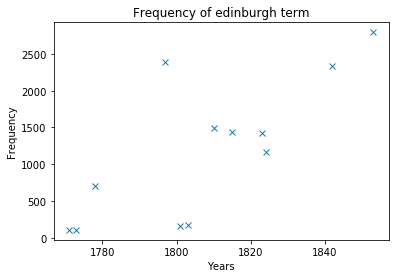

In [10]:
edinburgh_f_count=freq_count(edinburgh_vdf)
plot_freq_count(edinburgh_f_count, "edinburgh")

In [11]:
#displaying the same information as a dictionary - keys are the years, and values are frequencies
edinburgh_f_count

{1771: 110,
 1773: 108,
 1778: 698,
 1797: 2388,
 1801: 156,
 1803: 172,
 1810: 1487,
 1815: 1438,
 1823: 1422,
 1824: 1162,
 1842: 2330,
 1853: 2794}

###  Exploring "Woman" Term

First we select the rows from the dataframe that has the **"woman"** string in the "term" column, and count the number of elements. 

Later we visualize the left and right words for each **"woman"** term found

And finally, we visualize the frequency of the **"woman"** over the years.

In [12]:
woman_vdf= visualize_term(df, "woman")
print("The number of hits is: %s" %woman_vdf['term'].value_counts())
#Just printing the first 10 hits, since we have 9172 rows for this term
woman_vdf.head(10)

The number of hits is: woman    9172
Name: term, dtype: int64


,year,words_left,term,words_right
53,1853,"clodius', 'with', 'having', 'entered', 'this', 'temple', 'disguised', 'as', 'a', 'sing...",woman,"'and', 'by', 'his', 'presence', 'polluted', 'the', 'mysteries', 'of', 'the', 'bona']"
54,1853,"unfrequently', 'that', 'the', 'state', 'comes', 'to', 'be', 'governed', 'by', 'a'",woman,"'as', 'the', 'principle', 'of', 'the', 'salic', 'law', 'is', 'here', 'unknown']"
64,1853,"opposed', 'by', 'the', 'begum', 'widow', 'of', 'the', 'deceased', 'nawaub', 'a'",woman,"'of', 'some', 'ability', 'and', 'who', 'had', 'enjoyed', 'since', 'the', 'death']"
95,1853,"married', 'calpurnia', 'who', 'was', 'considerably', 'younger', 'than', 'himselfa', 'h...",woman,"'and', 'a', 'member', 'of', 'an', 'illustrious', 'family', 'he', 'had', 'no']"
220,1853,"wives', 'or', 'husbands', 'in', 'the', 'possession', 'of', 'one', 'man', 'or'",woman,"'at', 'the', 'same', 'time', 'polygamy', 'has', 'found', 'favour', 'in', 'asia']"
227,1853,"some', 'near', 'relative', 'entering', 'the', 'house', 'set', 'apart', 'for', 'the'",woman,"'would', 'be', 'put', 'to', 'death', 'or', 'reduced', 'to', 'slavery', 'wars']"
293,1853,"the', 'earl', 'of', 'southampton', 'occupied', 'by', 'the', 'countess', 'dowager', 'a'",woman,"'of', 'honour', 'to', 'whom', 'the', 'king', 'knew', 'he', 'might', 'safely']"
299,1853,"all', 'just', 'power', 'and', 'to', 'add', 'to', 'their', 'zeal', 'a'",woman,"'of', 'herefordshire', 'illuminated', 'by', 'prophetical', 'visions', 'desired', 'adm..."
323,1853,"marriages', 'the', 'proportion', 'will', 'be', 'to', 'that', 'is', 'each', 'married'",woman,"'will', 'have', 'births', 'but', 'of', 'these', 'married', 'women', 'some', 'have']"
324,1853,"from', 'all', 'the', 'marriages', 'in', 'which', 'the', 'age', 'of', 'the'",woman,"'did', 'not', 'exceed', 'thirtyfive', 'nor', 'the', 'age', 'of', 'the', 'man']"


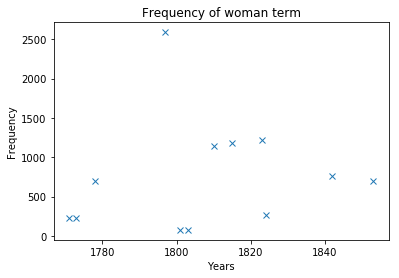

In [13]:
woman_f_count=freq_count(woman_vdf)
plot_freq_count(woman_f_count, "woman")

In [14]:
#displaying the same information as a dictionary - keys are the years, and values are frequencies
woman_f_count

{1771: 225,
 1773: 226,
 1778: 702,
 1797: 2590,
 1801: 76,
 1803: 79,
 1810: 1146,
 1815: 1178,
 1823: 1225,
 1824: 260,
 1842: 768,
 1853: 697}

###  Exploring "Maid" Term

First we select the rows from the dataframe that has the **"maid"** string in the "term" column, and count the number of elements. 

Later we visualize the left and right words for each **"maid"** term found

And finally, we visualize the frequency of the **"maid"** over the years.

In [15]:
maid_vdf= visualize_term(df, "maid")
print("The number of hits is: %s" %maid_vdf['term'].value_counts())
#Just printing the first 10 hits, since we have 714 rows for this term
maid_vdf.head(10)

The number of hits is: maid    714
Name: term, dtype: int64


,year,words_left,term,words_right
115,1853,"to', 'goethe', 'had', 'he', 'never', 'written', 'william', 'tell', 'or', 'the'",maid,"'of', 'orleans', 'or', 'wallenstein', 'in', 'one', 'particular', 'he', 'must', 'rank']"
413,1853,"stanzas', 'roman', 'camp', 'by', 'malcolm', 'iv', 'in', 'this', 'building', 'the'",maid,"'of', 'elvar', 'illustrative', 'of', 'dumfriesshire', 'scenery', 'however', 'was', 'd..."
414,1853,"connected', 'with', 'wing', 'w', 'r', 'as', 'not', 'formed', 'as', 'the'",maid,"'of', 'elvar', 'proves', 'for', 'a', 'st', 's', 'weekly', 'cornmarkets', 'and']"
793,1853,"ward', 'his', 'operas', 'of', 'love', 'm', 'a', 'village', 'and', 'the'",maid,"'of', 'the', 'as', 'retired', 'as', 'if', 'he', 'had', 'been', 'still']"
1066,1853,"the', 'storie', 'aid', 'eldaris', 'deidis', 'to', 'put', 'into', 'memorie', 'tha'",maid,"'tha', 'bukis', 'thair', 'tractatis', 'and', 'thair', 'tabilis', 'part', 'be', 'ges']"
2219,1853,"million', 'pounds', 'sterling', 'the', 'stampduty', 'contributes', 'l', 'the', 'octroi...",maid,"'und', 'schlachtsteuer', 'raised', 'at', 'the', 'gates', 'of', 'prussian', 'towns', '..."
2231,1853,"became', 'sensible', 'by', 'degrees', 'and', 'was', 'at', 'last', 'a', 'living'",maid,"'who', 'found', 'herself', 'in', 'her', 'lovers', 'arms', 'the', 'moment', 'she']"
2491,1853,"on', 'festive', 'occasions', 'milton', 'represents', 'in', 'his', 'lallegro', 'youth',...",maid,"'dancing', 'to', 'the', 'jocund', 'rebecks', 'sound', 'and', 'byron', 'speaking', 'of']"
3506,1853,"knight', 'who', 'of', 'his', 'port', 'was', 'meek', 'as', 'is', 'a'",maid,"'and', 'never', 'yet', 'no', 'villany', 'he', 'said', 'and', 'he', 'makes']"
3536,1853,"set', 'lias', 'described', 'a', 'somniferous', 'ball', 'or', 'sponge', 'spongia', 'som...",maid,"'of', 'the', 'wife', 'of', 'elphin', 'into', 'a', 'deep', 'sleep', 'with']"


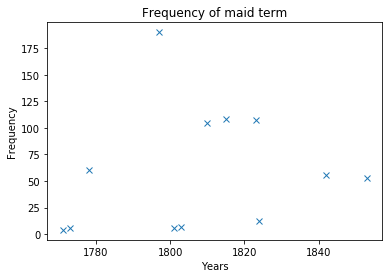

In [16]:
maid_f_count=freq_count(maid_vdf)
plot_freq_count(maid_f_count, "maid")

In [17]:
#displaying the same information as a dictionary - keys are the years, and values are frequencies
maid_f_count

{1771: 4,
 1773: 6,
 1778: 60,
 1797: 190,
 1801: 6,
 1803: 7,
 1810: 105,
 1815: 108,
 1823: 107,
 1824: 12,
 1842: 56,
 1853: 53}

###  Exploring "Man" Term
First we select the rows from the dataframe that has the **"man"** string in the "term" column, and count the number of elements. 

Later we visualize the left and right words for each **"man"** term found

And finally, we visualize the frequency of the **"man"** over the years.

In [18]:
man_vdf= visualize_term(df, "man")
print("The number of hits is: %s" %man_vdf['term'].value_counts())
#Just printing the first 10 hits, since we have 80062 rows for this term
man_vdf.head(10)

The number of hits is: man    80062
Name: term, dtype: int64


,year,words_left,term,words_right
0,1853,"the', 'soul', 'he', 'is', 'eulogized', 'by', 'luther', 'as', 'an', 'excellent'",man,"'bonaventura', 'prcestantissimus', 'vir', 'and', 'characterized', 'by', 'bellarmin', ..."
1,1853,"by', 'bellarmin', 'as', 'a', 'doctor', 'alike', 'beloved', 'by', 'god', 'and'",man,"'bonavista', 'or', 'boavista', 'an', 'island', 'near', 'the', 'western', 'coast', 'of']"
2,1853,"renounced', 'his', 'liberty', 'and', 'became', 'a', 'slave', 'to', 'some', 'great'",man,"'which', 'was', 'done', 'by', 'the', 'ceremony', 'of', 'cutting', 'oft', 'a']"
3,1853,"which', 'he', 'bore', 'with', 'exemplary', 'patience', 'and', 'serenity', 'this', 'exc...",man,"'died', 'on', 'the', 'th', 'may', 'at', 'the', 'age', 'of', 'seventythree']"
4,1853,"necessary', 'as', 'clothing', 'and', 'shelter', 'to', 'the', 'comfort', 'of', 'civilized'",man,"'hence', 'the', 'multiplication', 'of', 'books', 'and', 'the', 'gradual', 'but', 'rad..."
5,1853,"feet', 'in', 'height', 'with', 'impenetrable', 'thickets', 'of', 'trees', 'and', 'unde...",man,"'scarcely', 'dares', 'to', 'penetrate', 'into', 'these', 'gloomy', 'regions', 'which'..."
6,1853,"spending', 'in', 'courtship', 'or', 'otherwise', 'a', 'larger', 'sum', 'than', 'a'",man,"'was', 'supposed', 'to', 'be', 'able', 'to', 'afford', 'gave', 'ground', 'for']"
7,1853,"sometimes', 'screams', 'and', 'usually', 'arrested', 'all', 'progress', 'to', 'intimac...",man,"'who', 'had', 'served', 'them', 'for', 'two', 'or', 'three', 'weeks', 'although']"
16,1853,"a', 'scholar', 'and', 'philosopher', 'of', 'no', 'mean', 'note', 'was', 'a'",man,"'of', 'primitive', 'benevolence', 'and', 'integrity', 'and', 'of', 'great', 'vivacity..."
17,1853,"to', 'remark', 'how', 'much', 'it', 'suffered', 'in', 'thus', 'losing', 'a'",man,"'by', 'whose', 'talents', 'its', 'reputation', 'would', 'have', 'been', 'so', 'highly']"


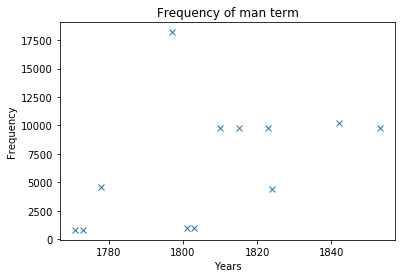

In [19]:
man_f_count=freq_count(man_vdf)
plot_freq_count(man_f_count, "man")

In [20]:
#displaying the same information as a dictionary - keys are the years, and values are frequencies
man_f_count

{1771: 810,
 1773: 826,
 1778: 4548,
 1797: 18200,
 1801: 989,
 1803: 999,
 1810: 9759,
 1815: 9756,
 1823: 9755,
 1824: 4404,
 1842: 10241,
 1853: 9775}